## Visualizations

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [27]:
train = pd.read_csv('data/train_clean.csv')
test = pd.read_csv('data/test_clean.csv')

In [28]:
train.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Churn', 'ServiceArea', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'N

In [29]:
demographic_columns = {
    "PrizmCode": "Urban vs Rural", #demographic
    "Occupation": "Occupation", #demographic
    "MaritalStatus": "Marital Status", #demographic
    "Homeownership": "Homeownership", #demographic
}

financial_columns = {
    "CreditRating": "Credit Rating", #financial
    "IncomeGroup": "Income Group", #financial
}

In [30]:
colors_of_seoul = [
    "#DD516C",
    "#5676A5",
    "#2C5044",
    "#C1641E",
    "#98212B",
    "#563935",
]

### Count Data

#### Financial Covariate Distributions

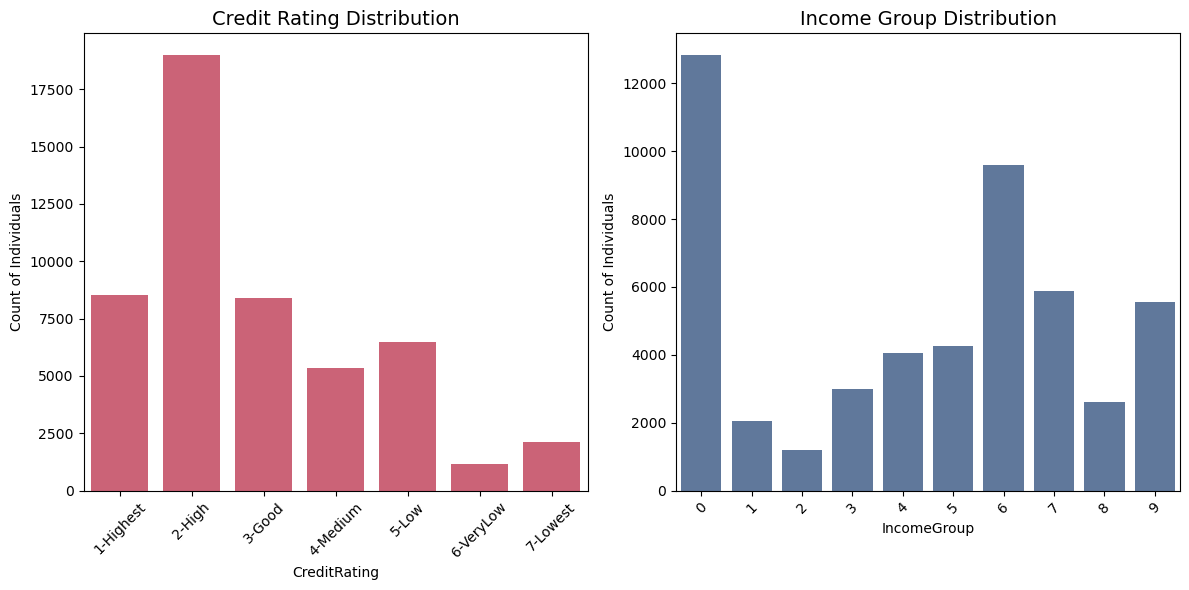

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for ax, column, color in zip(ax.ravel(), financial_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{financial_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

#### Demographic Covariates Distribution

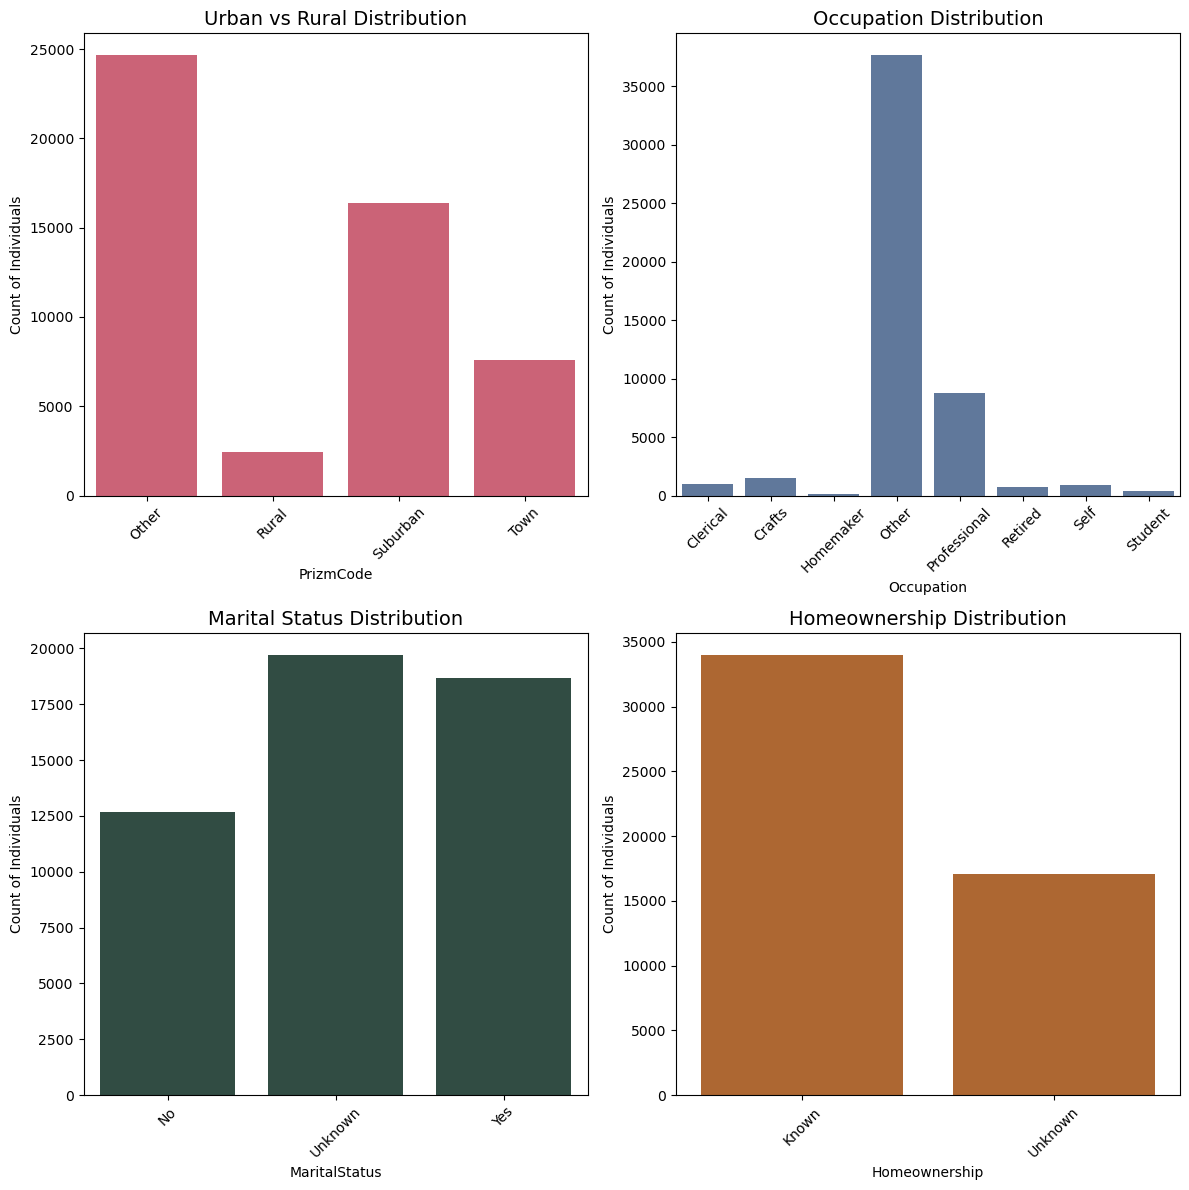

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), demographic_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{demographic_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

### Continous Variables Distribution

In [33]:
continous_features = train.select_dtypes(include=[np.float64]).columns
# Need to choose correct subset of features
continous_features = continous_features[0:6]

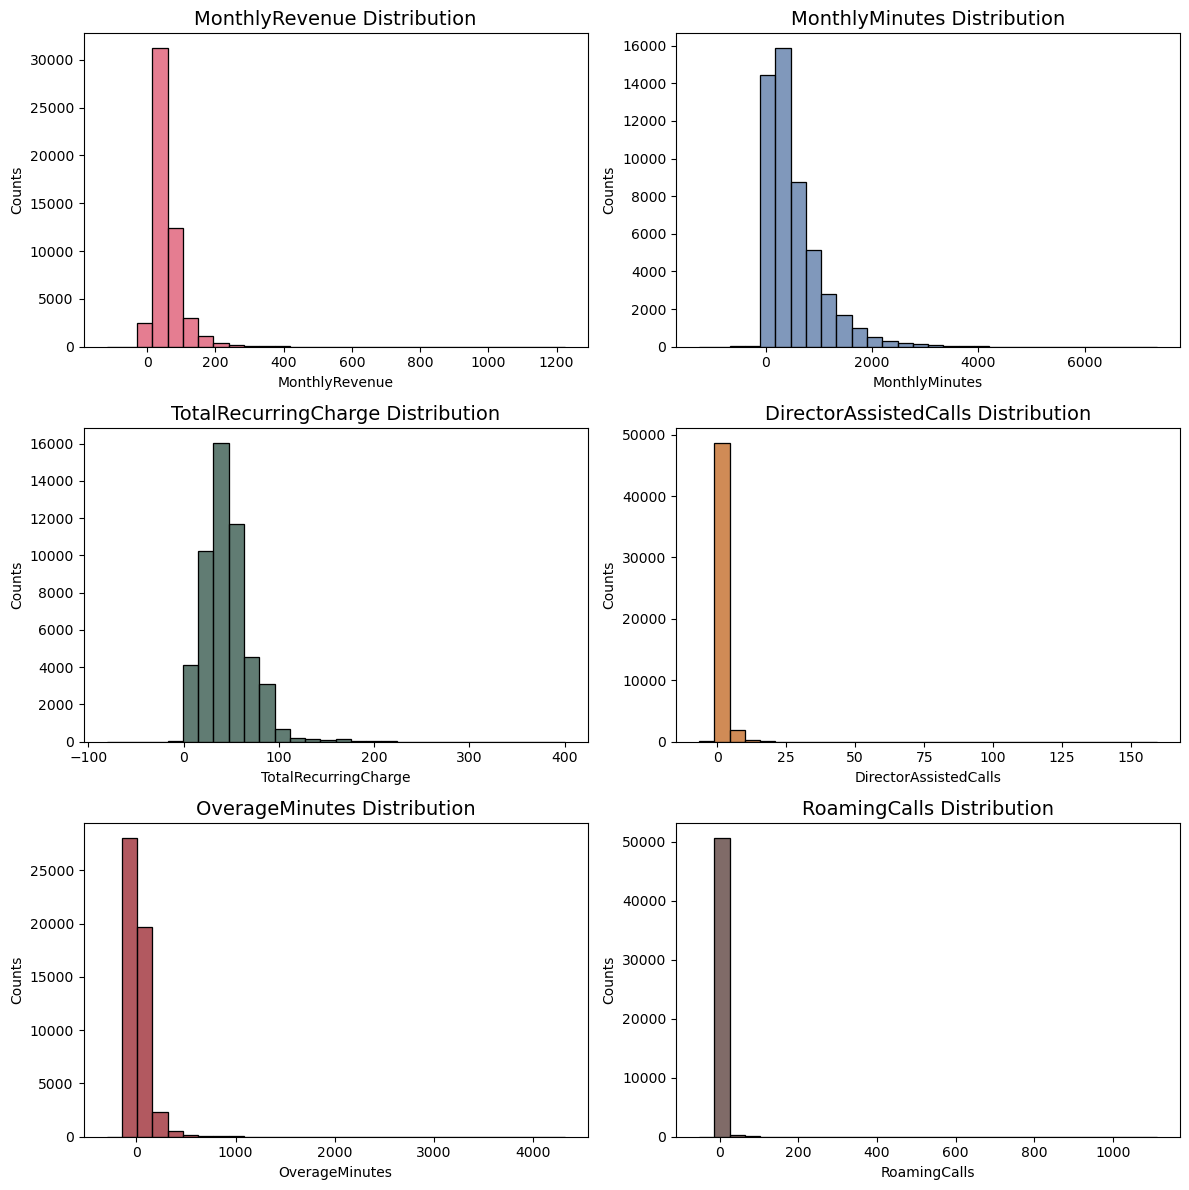

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), continous_features, colors_of_seoul):
    sns.histplot(x=column, data=train[[column]], bins=30, ax=ax, color=color)
    ax.set_title(f'{column} Distribution', fontsize=14)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)

plt.tight_layout()

### Determining Features that Correlate with Churn

In [35]:
X_train = train.drop(columns=['CustomerID', 'Churn'])
pd.set_option('future.no_silent_downcasting', True)
y_train = train['Churn'].replace({'Yes': 1, 'No': 0})

In [36]:
continuous_features = [
    "MonthlyRevenue", 
    "TotalRecurringCharge",
    "OverageMinutes",
    "MonthlyMinutes",
    "DroppedCalls",
    "ReceivedCalls",
]

# Total of 6
count_features = list(financial_columns.keys()) + list(demographic_columns.keys())

features = continuous_features + count_features

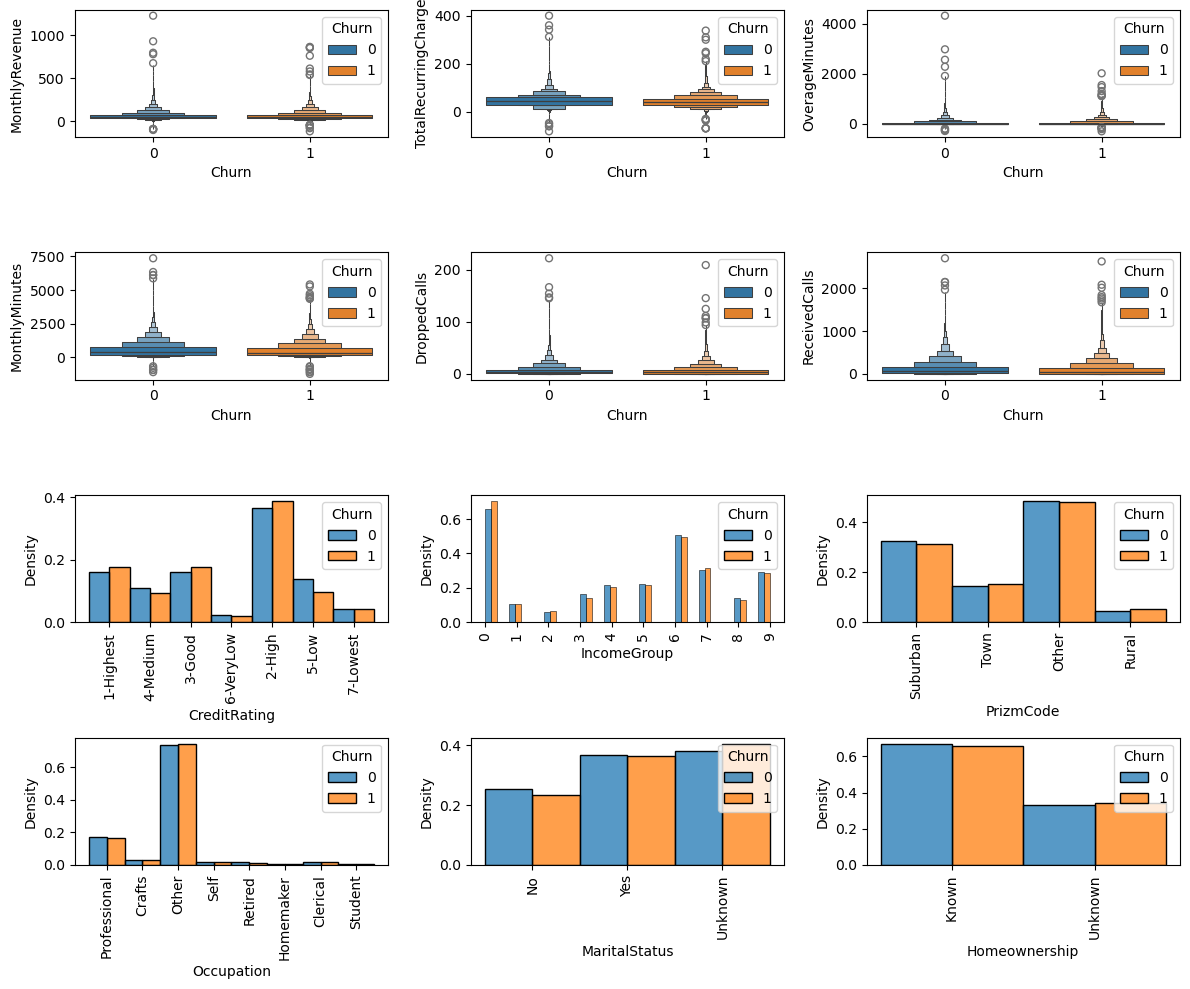

In [37]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), features):
    if feature in continuous_features:
        _=sns.boxenplot(
            x="Churn", 
            y=feature, 
            data=pd.concat([X_train, y_train], axis=1),
            hue='Churn', 
            ax=ax
        )
        
    elif (feature in count_features):
        _ = sns.histplot(
            x=feature, 
            hue="Churn", 
            multiple="dodge", 
            stat='density', 
            common_norm=False,
            data = pd.concat([X_train, y_train], axis=1),
            ax=ax
        )
        ax.set_xticks(np.arange(X_train[feature].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        pass
    

plt.tight_layout()

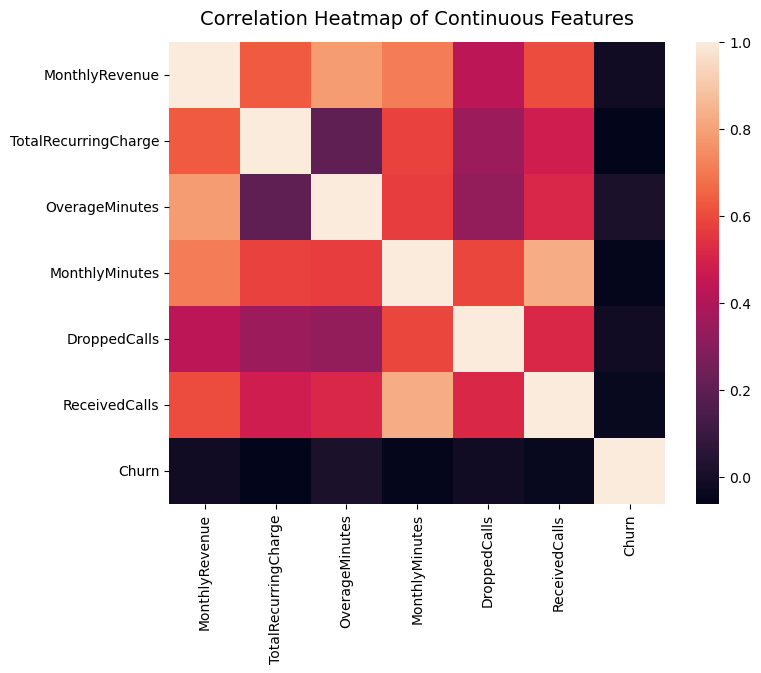

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))  

sns.heatmap(
    pd.concat([X_train[continuous_features], y_train], axis=1).corr(method='pearson'),
    ax=ax,
)
ax.set_title('Correlation Heatmap of Continuous Features', fontsize=14, y=1.02)
plt.show();

TODO after Baseline Model
1. Decision Boundary
2. Feature Importance
3. Sigmoid Curve